# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(3791)

In [75]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [76]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [77]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [78]:
#methods to use thoughout the exercise 
# From the datacamp statistical thinking in python exercises
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. What test is appropriate for this problem? Does CLT apply?

In [79]:
data.race.describe()

count     4870
unique       2
top          w
freq      2435
Name: race, dtype: object

In [80]:
data.call.describe()

count    4870.000000
mean        0.080493
std         0.272079
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

The appropriate test to use for this problem would be a hypothesis test to see if resumes with white sounding and black sounding names are not called back with the same frequency. CLT applies to this problem. There are 4870 samples, much less than 10% of the human population. Therefore, the samples can be assumed to be random. Additionally, there are over 30 successes and failures where successes are classified as resumes with callbacks and failures are classified as resumes which failed to be called back. There are a total of 392 callbacks across the 4870 data points. Therefore, the CLT can apply to this problem.

In [81]:
w = data[data.race=='w']
b = data[data.race=='b']

   2. What are the null and alternate hypotheses?

The null hypothesis is H$_0$: The probability of recieving a callback is the same for resumes with white sounding and black sounding names.

The alternate hypothesis is H$_1$: The the probability of recieving a callback is different for resumes with white and black sounding names.

In [82]:
# Your solution to Q3 here

   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.


In [83]:
probWhite = np.mean(w.call)
print('The probability of a resume with a white sounding name recieving a callback is {:.5f}'.format(probWhite))
#this is the same as the mean of w.call
probBlack = np.mean(b.call)
print('The probability of a resume with a black sounding name recieving a callback is {:.5f}'.format(probBlack))

print('The difference in probabilities of resumes with white or black sounding names being called back is {:.5f}'.format(np.mean(w.call) - np.mean(b.call)))


The probability of a resume with a white sounding name recieving a callback is 0.09651
The probability of a resume with a black sounding name recieving a callback is 0.06448
The difference in probabilities of resumes with white or black sounding names being called back is 0.03203


Using the bootstrapping approach:

95% confidence interval = [0.01683778 0.04722793] difference in percent


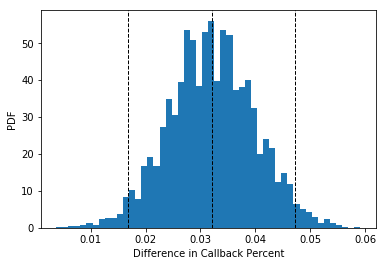

p =  0.0
The p value of 0.0 suggests that the null hypothesis should be rejected.


In [84]:
#make an array of the differences in the callbacks, the mean of which will be the difference of the probilities
wcalls = np.array(w.call)
bcalls = np.array(b.call)
diff = wcalls - bcalls

#draw bs_replicates from both samples and take their difference
#to find the difference of probabilities of these samples
bs_replicates_w = draw_bs_reps(w.call, np.mean, 10000)
bs_replicates_b = draw_bs_reps(b.call, np.mean, 10000)
bs_replicates = bs_replicates_w - bs_replicates_b

#calculate the confidence intervals
conf_int = np.percentile(bs_replicates, [2.5,97.5])

print('95% confidence interval =', conf_int, 'difference in percent')

# Plot the histogram of the replicates, the mean, and the 95% confidence interval
plt.hist(bs_replicates, bins=50, normed=True)
plt.axvline(np.mean(bs_replicates), color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[1], color='k', linestyle='dashed', linewidth=1)

plt.xlabel('Difference in Callback Percent')
plt.ylabel('PDF')

plt.show()


#Find the p-value, assuming the null hypothesis that the difference in means is 0
mean = np.mean(diff)
std = np.std(diff)

percent_shifted =  diff - mean

bs_replicates = draw_bs_reps(percent_shifted, np.mean, 10000)

p = np.sum(bs_replicates >= mean) / 10000

print('p = ', p)
print('The p value of {} suggests that the null hypothesis should be rejected.'.format(p))

Using the frequistic approach:

In [85]:
test_score=mean/(std/np.sqrt(2435))
print('The test statistic is {:.5f} '.format(test_score))

p_value=stats.norm.cdf(-1*test_score)*2
print('The p-value calculated from the z-score is {:.9f}'.format(p_value))

The test statistic is 5.08274 
The p-value calculated from the z-score is 0.000000372


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

   4. Write a story describing the statistical significance in the context or the original problem.
   
The null hypothesis, that the probability of recieving a callback is the same for resumes with white sounding and black sounding names, can be soundly rejected from this analysis. Both bootstrapping and frequentist methods showed a p-value much less than $\alpha$ = 0.05, proving with relative certainty that the null hypothesis can be rejected. The 95% confidence interval showed that it is most likely that applicants with white sounding names are 1.6% to 4.7% more likely to recieve callbacks that applicants with black sounding names given the same resumes. Therefore, it is reasonable to conclude that race does play a role in the likelihood of job applicants getting a callback on their resume, with white applicants being priviledged over black applicants.

   


   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
   
   This analysis does not mean that race/name is the most important factor in callback success. This only measured the fact that race/name is in fact one of the factors in callback success. To say that race/name is the most important factor in callback succes, I would have to do similar analyses to all of the different possible factors included in this dataset such as education, years of experience, etc, to see which ones are factors in callback success. From there I would have to compare all of the factors in callback success to determine which one is the most important. 
